<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/Copy_of_Sentiment_Analysis_and_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob
!python -m spacy download en_core_web_sm

In [3]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [7]:
def analyze_urls_from_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        # Check for required columns in the DataFrame
        if not all(col in df.columns for col in ['Country', 'URL']):
            raise ValueError("The CSV file must contain 'Country' and 'URL' columns.")

    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file_path}' is empty.")
        return None
    except ValueError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


    results = []
    processed_urls = set()  # Keep track of processed URLs

    for index, row in df.iterrows():
        country = row['Country']
        url = row['URL']

        if url in processed_urls:
            print(f"Skipping URL (already processed): {url}")
            continue

        processed_urls.add(url)  # Add URL to processed set

        try:
            raw = parser.from_file(url)
            text = raw.get('content', '')  # Handle cases where 'content' might be missing
            if not text:
              print(f"Warning: No text content found for URL: {url}")
              continue #Skip to the next URL

            doc = nlp(text)
            sentiment = doc._.blob.polarity
            polarity = doc._.blob.polarity
            subjectivity = doc._.blob.subjectivity
            overall_sentiment = "Positive" if sentiment > 0.1 else ("Negative" if sentiment < -0.1 else "Neutral")

            results.append([country, url, sentiment, polarity, subjectivity, overall_sentiment])
            print(f"Processed URL: {url}")

        except Exception as e:
            print(f"Error processing URL '{url}': {e}")

    results_df = pd.DataFrame(results, columns=['Country', 'URL', 'Sentiment', 'Polarity', 'Subjectivity', 'Overall Sentiment'])
    return results_df

# Example usage (replace 'your_file.csv' with the actual file path)
file_path = 'your_file.csv'  #Provide the name of the uploaded file
results_df = analyze_urls_from_csv(file_path)

if results_df is not None:
    display(results_df)
    # You can save the results to a new CSV file:
    #results_df.to_csv('sentiment_analysis_results.csv', index=False)

Error: File 'your_file.csv' not found.


In [9]:
from google.colab import files
uploaded = files.upload()
file_path = list(uploaded.keys())[0] # Get the name of the uploaded file

# Now you can use file_path in your analyze_urls_from_csv function
results_df = analyze_urls_from_csv(file_path)

if results_df is not None:
    display(results_df)

2025-01-23 23:32:44,432 [MainThread  ] [INFO ]  Retrieving https://pubmed.ncbi.nlm.nih.gov/39592827/ to /tmp/39592827.
INFO:tika.tika:Retrieving https://pubmed.ncbi.nlm.nih.gov/39592827/ to /tmp/39592827.
2025-01-23 23:32:44,586 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.


Saving NLP Sentiments 2.csv to NLP Sentiments 2.csv


2025-01-23 23:32:44,862 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2025-01-23 23:32:45,132 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2025-01-23 23:32:51,097 [MainThread  ] [INFO ]  Retrieving https://www.sciencedirect.com/science/article/pii/S0960148122003494 to /tmp/science-article-pii-s0960148122003494.
INFO:tika.tika:Retrieving https://www.sciencedirect.com/science/article/pii/S0960148122003494 to /tmp/science-article-pii-s0960148122003494.


Processed URL: https://pubmed.ncbi.nlm.nih.gov/39592827/


2025-01-23 23:32:51,440 [MainThread  ] [INFO ]  Retrieving https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/ to /tmp/publications-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability.
INFO:tika.tika:Retrieving https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/ to /tmp/publications-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability.
2025-01-23 23:32:51,514 [MainThread  ] [INFO ]  Retrieving https://sdpi.org/assets/lib/uploads/Environmental-implications-of-coal-based-energy-under-CPEC.pdf to /tmp/assets-lib-uploads-environmental-implications-of-coal-based-energy-under-cpec.pdf.
INFO:tika.tika:Retrieving https://sdpi.org/assets/lib/uploads/Environmental-implications-of-coal-based-energy-under-CPEC.pdf to /tmp/asset

Error processing URL 'https://www.sciencedirect.com/science/article/pii/S0960148122003494': HTTP Error 403: Forbidden
Error processing URL 'https://www.energypolicy.columbia.edu/publications/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt-sustainability/': HTTP Error 403: Forbidden


2025-01-23 23:32:54,463 [MainThread  ] [INFO ]  Retrieving https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/ to /tmp/explore-themes-energy-environment-cpec-promoting-green-and-sustainable-development.
INFO:tika.tika:Retrieving https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/ to /tmp/explore-themes-energy-environment-cpec-promoting-green-and-sustainable-development.


Processed URL: https://sdpi.org/assets/lib/uploads/Environmental-implications-of-coal-based-energy-under-CPEC.pdf


2025-01-23 23:32:54,963 [MainThread  ] [INFO ]  Retrieving https://pmc.ncbi.nlm.nih.gov/articles/PMC11259830/ to /tmp/articles-pmc11259830.
INFO:tika.tika:Retrieving https://pmc.ncbi.nlm.nih.gov/articles/PMC11259830/ to /tmp/articles-pmc11259830.


Error processing URL 'https://cscr.pk/explore/themes/energy-environment/cpec-promoting-green-and-sustainable-development/': <urlopen error [Errno 104] Connection reset by peer>


2025-01-23 23:32:55,225 [MainThread  ] [INFO ]  Retrieving https://sdpi.org/green-china-pakistan-economic-corridor-cpec-alliance/event_detail to /tmp/green-china-pakistan-economic-corridor-cpec-alliance-event_detail.
INFO:tika.tika:Retrieving https://sdpi.org/green-china-pakistan-economic-corridor-cpec-alliance/event_detail to /tmp/green-china-pakistan-economic-corridor-cpec-alliance-event_detail.


Error processing URL 'https://pmc.ncbi.nlm.nih.gov/articles/PMC11259830/': HTTP Error 403: Forbidden


2025-01-23 23:32:57,147 [MainThread  ] [INFO ]  Retrieving https://link.springer.com/article/10.1007/s11356-022-22813-3 to /tmp/article-10.1007-s11356-022-22813-3.
INFO:tika.tika:Retrieving https://link.springer.com/article/10.1007/s11356-022-22813-3 to /tmp/article-10.1007-s11356-022-22813-3.


Processed URL: https://sdpi.org/green-china-pakistan-economic-corridor-cpec-alliance/event_detail


2025-01-23 23:33:01,941 [MainThread  ] [INFO ]  Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.
INFO:tika.tika:Retrieving https://people.climate.columbia.edu/projects/view/232 to /tmp/projects-view-232.


Processed URL: https://link.springer.com/article/10.1007/s11356-022-22813-3


2025-01-23 23:33:02,336 [MainThread  ] [INFO ]  Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.
INFO:tika.tika:Retrieving https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/ to /tmp/en-business-11750-why-don-t-cpec-projects-factor-in-the-climate-crisis.


Processed URL: https://people.climate.columbia.edu/projects/view/232


2025-01-23 23:33:03,181 [MainThread  ] [INFO ]  Retrieving https://www.eurasiantimes.com/cpec-environment-renewable-energy/ to /tmp/cpec-environment-renewable-energy.
INFO:tika.tika:Retrieving https://www.eurasiantimes.com/cpec-environment-renewable-energy/ to /tmp/cpec-environment-renewable-energy.


Processed URL: https://dialogue.earth/en/business/11750-why-don-t-cpec-projects-factor-in-the-climate-crisis/


2025-01-23 23:33:04,587 [MainThread  ] [INFO ]  Retrieving https://link.springer.com/article/10.1007/s11356-019-07428-5 to /tmp/article-10.1007-s11356-019-07428-5.
INFO:tika.tika:Retrieving https://link.springer.com/article/10.1007/s11356-019-07428-5 to /tmp/article-10.1007-s11356-019-07428-5.


Processed URL: https://www.eurasiantimes.com/cpec-environment-renewable-energy/


2025-01-23 23:33:07,145 [MainThread  ] [INFO ]  Retrieving https://ojs.jdss.org.pk/journal/article/view/820 to /tmp/journal-article-view-820.
INFO:tika.tika:Retrieving https://ojs.jdss.org.pk/journal/article/view/820 to /tmp/journal-article-view-820.


Processed URL: https://link.springer.com/article/10.1007/s11356-019-07428-5


2025-01-23 23:33:08,385 [MainThread  ] [INFO ]  Retrieving https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/ to /tmp/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec.
INFO:tika.tika:Retrieving https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/ to /tmp/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec.


Processed URL: https://ojs.jdss.org.pk/journal/article/view/820


2025-01-23 23:33:10,189 [MainThread  ] [INFO ]  Retrieving https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/ to /tmp/gdp-2022-01-24-what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio.
INFO:tika.tika:Retrieving https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/ to /tmp/gdp-2022-01-24-what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio.


Processed URL: https://greenfdc.org/green-finance-guideline-baseline-for-china-pakistan-economic-corridor-cpec/


2025-01-23 23:33:10,908 [MainThread  ] [INFO ]  Retrieving https://dialogue.earth/en/energy/gwadar-coal-returns-to-china-pakistan-economic-corridor/ to /tmp/en-energy-gwadar-coal-returns-to-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://dialogue.earth/en/energy/gwadar-coal-returns-to-china-pakistan-economic-corridor/ to /tmp/en-energy-gwadar-coal-returns-to-china-pakistan-economic-corridor.


Processed URL: https://www.bu.edu/gdp/2022/01/24/what-drives-pakistans-coal-fired-power-plant-construction-boom-understanding-the-china-pakistan-economic-corridors-energy-portfolio/


2025-01-23 23:33:11,809 [MainThread  ] [INFO ]  Retrieving https://migrationletters.com/index.php/ml/article/view/11540/7709 to /tmp/index.php-ml-article-view-11540-7709.
INFO:tika.tika:Retrieving https://migrationletters.com/index.php/ml/article/view/11540/7709 to /tmp/index.php-ml-article-view-11540-7709.


Processed URL: https://dialogue.earth/en/energy/gwadar-coal-returns-to-china-pakistan-economic-corridor/


2025-01-23 23:33:12,660 [MainThread  ] [INFO ]  Retrieving https://cpec.gov.pk to /tmp/file_1737675192.
INFO:tika.tika:Retrieving https://cpec.gov.pk to /tmp/file_1737675192.


Processed URL: https://migrationletters.com/index.php/ml/article/view/11540/7709


2025-01-23 23:33:15,459 [MainThread  ] [INFO ]  Retrieving http://www.xinhuanet.com/english/2019-08/11/c_138300906.htm to /tmp/english-2019-08-11-c_138300906.htm.
INFO:tika.tika:Retrieving http://www.xinhuanet.com/english/2019-08/11/c_138300906.htm to /tmp/english-2019-08-11-c_138300906.htm.


Processed URL: https://cpec.gov.pk


2025-01-23 23:33:17,032 [MainThread  ] [INFO ]  Retrieving https://thediplomat.com/2018/04/cpecs-environmental-toll/ to /tmp/2018-04-cpecs-environmental-toll.
INFO:tika.tika:Retrieving https://thediplomat.com/2018/04/cpecs-environmental-toll/ to /tmp/2018-04-cpecs-environmental-toll.
2025-01-23 23:33:17,103 [MainThread  ] [INFO ]  Retrieving https://ideas.repec.org/a/eee/renene/v190y2022icp188-207.html to /tmp/a-eee-renene-v190y2022icp188-207.html.
INFO:tika.tika:Retrieving https://ideas.repec.org/a/eee/renene/v190y2022icp188-207.html to /tmp/a-eee-renene-v190y2022icp188-207.html.


Processed URL: http://www.xinhuanet.com/english/2019-08/11/c_138300906.htm
Error processing URL 'https://thediplomat.com/2018/04/cpecs-environmental-toll/': HTTP Error 403: Forbidden


2025-01-23 23:33:18,357 [MainThread  ] [INFO ]  Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.
INFO:tika.tika:Retrieving http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf to /tmp/admineditor-papers-v11i1-13.pdf.


Processed URL: https://ideas.repec.org/a/eee/renene/v190y2022icp188-207.html


2025-01-23 23:33:23,073 [MainThread  ] [INFO ]  Retrieving https://pureportal.strath.ac.uk/en/publications/china-pakistan-economic-corridor-cpec-tourism-demand-and-environm/fingerprints/ to /tmp/en-publications-china-pakistan-economic-corridor-cpec-tourism-demand-and-environm-fingerprints.
INFO:tika.tika:Retrieving https://pureportal.strath.ac.uk/en/publications/china-pakistan-economic-corridor-cpec-tourism-demand-and-environm/fingerprints/ to /tmp/en-publications-china-pakistan-economic-corridor-cpec-tourism-demand-and-environm-fingerprints.


Processed URL: http://ajss.abasyn.edu.pk/admineditor/papers/V11I1-13.pdf


2025-01-23 23:33:23,302 [MainThread  ] [INFO ]  Retrieving https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/ to /tmp/strategic-competition-mapping-a-u-s-strategy-to-counter-chinas-cpec-clout.
INFO:tika.tika:Retrieving https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/ to /tmp/strategic-competition-mapping-a-u-s-strategy-to-counter-chinas-cpec-clout.
2025-01-23 23:33:23,440 [MainThread  ] [INFO ]  Retrieving https://www.thenews.com.pk/magazine/money-matters/1232789-cpecs-road-to-renewables to /tmp/magazine-money-matters-1232789-cpecs-road-to-renewables.
INFO:tika.tika:Retrieving https://www.thenews.com.pk/magazine/money-matters/1232789-cpecs-road-to-renewables to /tmp/magazine-money-matters-1232789-cpecs-road-to-renewables.
2025-01-23 23:33:23,497 [MainThread  ] [INFO ]  Retrieving https://www.thehindu.com/news/international/china-refuses-to-further-expand-cooperation-with-pak-in

Error processing URL 'https://pureportal.strath.ac.uk/en/publications/china-pakistan-economic-corridor-cpec-tourism-demand-and-environm/fingerprints/': HTTP Error 403: Forbidden
Error processing URL 'https://newlinesinstitute.org/strategic-competition/mapping-a-u-s-strategy-to-counter-chinas-cpec-clout/': HTTP Error 403: Forbidden
Error processing URL 'https://www.thenews.com.pk/magazine/money-matters/1232789-cpecs-road-to-renewables': HTTP Error 403: Forbidden


2025-01-23 23:33:23,573 [MainThread  ] [INFO ]  Retrieving https://issra.pk/pub/insight/2023/A-DECADE-OF-CPEC–AN-APPRAISAL/A-DECADE-OF-CPEC–AN-APPRAISAL.html to /tmp/pub-insight-2023-a-decade-of-cpec-an-appraisal-a-decade-of-cpec-an-appraisal.html.
INFO:tika.tika:Retrieving https://issra.pk/pub/insight/2023/A-DECADE-OF-CPEC–AN-APPRAISAL/A-DECADE-OF-CPEC–AN-APPRAISAL.html to /tmp/pub-insight-2023-a-decade-of-cpec-an-appraisal-a-decade-of-cpec-an-appraisal.html.
2025-01-23 23:33:23,580 [MainThread  ] [INFO ]  Retrieving https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec to /tmp/news-returning-shadows-china-pakistan-and-fate-cpec.
INFO:tika.tika:Retrieving https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec to /tmp/news-returning-shadows-china-pakistan-and-fate-cpec.
2025-01-23 23:33:23,670 [MainThread  ] [INFO ]  Retrieving https://www.dawn.com/news/1857807 to /tmp/news-1857807.
INFO:tika.tika:Retrieving https://www.dawn.com/news/1857807 to /t

Error processing URL 'https://www.thehindu.com/news/international/china-refuses-to-further-expand-cooperation-with-pak-in-energy-water-climate-under-cpec/article67348727.ece': HTTP Error 403: Forbidden
Error processing URL 'https://issra.pk/pub/insight/2023/A-DECADE-OF-CPEC–AN-APPRAISAL/A-DECADE-OF-CPEC–AN-APPRAISAL.html': 'ascii' codec can't encode character '\u2013' in position 38: ordinal not in range(128)
Error processing URL 'https://www.gmfus.org/news/returning-shadows-china-pakistan-and-fate-cpec': HTTP Error 403: Forbidden


2025-01-23 23:33:25,234 [MainThread  ] [INFO ]  Retrieving https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html to /tmp/p-0jldqfpd.html.
INFO:tika.tika:Retrieving https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html to /tmp/p-0jldqfpd.html.


Processed URL: https://www.dawn.com/news/1857807


2025-01-23 23:33:29,906 [MainThread  ] [INFO ]  Retrieving https://www.worldscientific.com/doi/pdf/10.1142/S237774002150007X?srsltid=AfmBOorrzjQat0mHbvpzKzT25zkNRJYqJXEVZpIfh1g5pDBqzccZelwj to /tmp/doi-pdf-10.1142-s237774002150007x.
INFO:tika.tika:Retrieving https://www.worldscientific.com/doi/pdf/10.1142/S237774002150007X?srsltid=AfmBOorrzjQat0mHbvpzKzT25zkNRJYqJXEVZpIfh1g5pDBqzccZelwj to /tmp/doi-pdf-10.1142-s237774002150007x.
2025-01-23 23:33:29,994 [MainThread  ] [INFO ]  Retrieving https://www.pjoes.com/China-Pakistan-Economic-Corridor-nand-the-Impact-of-Coal-Based-Energy-Projects-non,112895,0,2.html to /tmp/china-pakistan-economic-corridor-nand-the-impact-of-coal-based-energy-projects-non-112895-0-2.html.
INFO:tika.tika:Retrieving https://www.pjoes.com/China-Pakistan-Economic-Corridor-nand-the-Impact-of-Coal-Based-Energy-Projects-non,112895,0,2.html to /tmp/china-pakistan-economic-corridor-nand-the-impact-of-coal-based-energy-projects-non-112895-0-2.html.


Processed URL: https://eng.yidaiyilu.gov.cn/p/0JLDQFPD.html
Error processing URL 'https://www.worldscientific.com/doi/pdf/10.1142/S237774002150007X?srsltid=AfmBOorrzjQat0mHbvpzKzT25zkNRJYqJXEVZpIfh1g5pDBqzccZelwj': HTTP Error 403: Forbidden


2025-01-23 23:33:30,958 [MainThread  ] [INFO ]  Retrieving https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec to /tmp/the-interpreter-china-s-big-gamble-pakistan-10-year-scorecard-cpec.
INFO:tika.tika:Retrieving https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec to /tmp/the-interpreter-china-s-big-gamble-pakistan-10-year-scorecard-cpec.


Processed URL: https://www.pjoes.com/China-Pakistan-Economic-Corridor-nand-the-Impact-of-Coal-Based-Energy-Projects-non,112895,0,2.html


2025-01-23 23:33:31,564 [MainThread  ] [INFO ]  Retrieving https://vc.bridgew.edu/cgi/viewcontent.cgi?article=2132&context=jiws to /tmp/cgi-viewcontent.cgi.
INFO:tika.tika:Retrieving https://vc.bridgew.edu/cgi/viewcontent.cgi?article=2132&context=jiws to /tmp/cgi-viewcontent.cgi.


Processed URL: https://www.lowyinstitute.org/the-interpreter/china-s-big-gamble-pakistan-10-year-scorecard-cpec


2025-01-23 23:33:34,740 [MainThread  ] [INFO ]  Retrieving  https://ieeexplore.ieee.org/document/8346410 to /tmp/document-8346410.
INFO:tika.tika:Retrieving  https://ieeexplore.ieee.org/document/8346410 to /tmp/document-8346410.
2025-01-23 23:33:34,817 [MainThread  ] [INFO ]  Retrieving https://www.chinadaily.com.cn/a/202410/15/WS670da8e8a310f1265a1c78d3.html to /tmp/a-202410-15-ws670da8e8a310f1265a1c78d3.html.
INFO:tika.tika:Retrieving https://www.chinadaily.com.cn/a/202410/15/WS670da8e8a310f1265a1c78d3.html to /tmp/a-202410-15-ws670da8e8a310f1265a1c78d3.html.


Processed URL: https://vc.bridgew.edu/cgi/viewcontent.cgi?article=2132&context=jiws
Error processing URL ' https://ieeexplore.ieee.org/document/8346410': HTTP Error 418: Unknown Code


2025-01-23 23:33:36,626 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html to /tmp/20240822-b469184d934c4c0aa15298d50eb7a485-c.html.


Processed URL: https://www.chinadaily.com.cn/a/202410/15/WS670da8e8a310f1265a1c78d3.html


2025-01-23 23:33:37,935 [MainThread  ] [INFO ]  Retrieving https://www.journal.multitechpublisher.com/index.php/ijla/article/view/2472/2566 to /tmp/index.php-ijla-article-view-2472-2566.
INFO:tika.tika:Retrieving https://www.journal.multitechpublisher.com/index.php/ijla/article/view/2472/2566 to /tmp/index.php-ijla-article-view-2472-2566.


Processed URL: https://english.news.cn/20240822/b469184d934c4c0aa15298d50eb7a485/c.html


2025-01-23 23:33:39,545 [MainThread  ] [INFO ]  Retrieving https://www.mei.edu/publications/imf-cpec-and-pakistan-will-chinese-save-islamabad-yet-again to /tmp/publications-imf-cpec-and-pakistan-will-chinese-save-islamabad-yet-again.
INFO:tika.tika:Retrieving https://www.mei.edu/publications/imf-cpec-and-pakistan-will-chinese-save-islamabad-yet-again to /tmp/publications-imf-cpec-and-pakistan-will-chinese-save-islamabad-yet-again.


Processed URL: https://www.journal.multitechpublisher.com/index.php/ijla/article/view/2472/2566


2025-01-23 23:33:40,361 [MainThread  ] [INFO ]  Retrieving https://www.mdpi.com/2673-4591/75/1/31 to /tmp/2673-4591-75-1-31.
INFO:tika.tika:Retrieving https://www.mdpi.com/2673-4591/75/1/31 to /tmp/2673-4591-75-1-31.
2025-01-23 23:33:40,445 [MainThread  ] [INFO ]  Retrieving https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/ to /tmp/articles-at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/ to /tmp/articles-at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor.
2025-01-23 23:33:40,519 [MainThread  ] [INFO ]  Retrieving https://ojs.pssr.org.pk/journal/article/view/394 to /tmp/journal-article-view-394.
INFO:tika.tika:Retrieving https://ojs.pssr.org.pk/journa

Processed URL: https://www.mei.edu/publications/imf-cpec-and-pakistan-will-chinese-save-islamabad-yet-again
Error processing URL 'https://www.mdpi.com/2673-4591/75/1/31': HTTP Error 403: Forbidden
Error processing URL 'https://www.brookings.edu/articles/at-all-costs-how-pakistan-and-china-control-the-narrative-on-the-china-pakistan-economic-corridor/': HTTP Error 403: Forbidden


2025-01-23 23:33:41,825 [MainThread  ] [INFO ]  Retrieving https://www.medwinpublishers.com/article-description.php?artId=12274 to /tmp/article-description.php.
INFO:tika.tika:Retrieving https://www.medwinpublishers.com/article-description.php?artId=12274 to /tmp/article-description.php.


Processed URL: https://ojs.pssr.org.pk/journal/article/view/394


2025-01-23 23:33:42,458 [MainThread  ] [INFO ]  Retrieving https://www.ejosdr.com/download/environmental-impact-assessment-eia-of-cpec-road-project-by-following-eia-index-approach-for-13107.pdf to /tmp/download-environmental-impact-assessment-eia-of-cpec-road-project-by-following-eia-index-approach-for-13107.pdf.
INFO:tika.tika:Retrieving https://www.ejosdr.com/download/environmental-impact-assessment-eia-of-cpec-road-project-by-following-eia-index-approach-for-13107.pdf to /tmp/download-environmental-impact-assessment-eia-of-cpec-road-project-by-following-eia-index-approach-for-13107.pdf.


Processed URL: https://www.medwinpublishers.com/article-description.php?artId=12274


2025-01-23 23:33:47,038 [MainThread  ] [INFO ]  Retrieving https://www.chinadailyhk.com/hk/article/595324 to /tmp/hk-article-595324.
INFO:tika.tika:Retrieving https://www.chinadailyhk.com/hk/article/595324 to /tmp/hk-article-595324.


Processed URL: https://www.ejosdr.com/download/environmental-impact-assessment-eia-of-cpec-road-project-by-following-eia-index-approach-for-13107.pdf


2025-01-23 23:33:50,002 [MainThread  ] [INFO ]  Retrieving https://invest.gov.pk/node/1821 to /tmp/node-1821.
INFO:tika.tika:Retrieving https://invest.gov.pk/node/1821 to /tmp/node-1821.


Processed URL: https://www.chinadailyhk.com/hk/article/595324


2025-01-23 23:33:53,807 [MainThread  ] [INFO ]  Retrieving https://bloomsbury.ac.uk/an-ethnographic-approach-to-geopolitics-cpec-and-the-making-of-chinese-realities-in-northern-pakistan/ to /tmp/an-ethnographic-approach-to-geopolitics-cpec-and-the-making-of-chinese-realities-in-northern-pakistan.
INFO:tika.tika:Retrieving https://bloomsbury.ac.uk/an-ethnographic-approach-to-geopolitics-cpec-and-the-making-of-chinese-realities-in-northern-pakistan/ to /tmp/an-ethnographic-approach-to-geopolitics-cpec-and-the-making-of-chinese-realities-in-northern-pakistan.


Processed URL: https://invest.gov.pk/node/1821


2025-01-23 23:33:54,569 [MainThread  ] [INFO ]  Retrieving https://acjce.com/?page_id=9569 to /tmp/.
INFO:tika.tika:Retrieving https://acjce.com/?page_id=9569 to /tmp/.


Processed URL: https://bloomsbury.ac.uk/an-ethnographic-approach-to-geopolitics-cpec-and-the-making-of-chinese-realities-in-northern-pakistan/


2025-01-23 23:33:58,041 [MainThread  ] [INFO ]  Retrieving https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/ to /tmp/en-publications-bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities.
INFO:tika.tika:Retrieving https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/ to /tmp/en-publications-bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities.
2025-01-23 23:33:58,134 [MainThread  ] [INFO ]  Retrieving https://en.imsilkroad.com/p/333352.html to /tmp/p-333352.html.
INFO:tika.tika:Retrieving https://en.imsilkroad.com/p/333352.html to /tmp/p-333352.html.


Error processing URL 'https://acjce.com/?page_id=9569': [Errno 21] Is a directory: '/tmp/'
Error processing URL 'https://odi.org/en/publications/bri-energy-infrastructure-in-pakistan-environmental-and-climate-risks-and-opportunities/': HTTP Error 403: Forbidden


2025-01-23 23:33:59,945 [MainThread  ] [INFO ]  Retrieving https://www.cadtm.org/Pakistan-CPEC-A-game-changer-or-another-East-India-Company to /tmp/pakistan-cpec-a-game-changer-or-another-east-india-company.
INFO:tika.tika:Retrieving https://www.cadtm.org/Pakistan-CPEC-A-game-changer-or-another-East-India-Company to /tmp/pakistan-cpec-a-game-changer-or-another-east-india-company.


Processed URL: https://en.imsilkroad.com/p/333352.html


2025-01-23 23:34:02,427 [MainThread  ] [INFO ]  Retrieving https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3928027 to /tmp/sol3-papers.cfm.
INFO:tika.tika:Retrieving https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3928027 to /tmp/sol3-papers.cfm.
2025-01-23 23:34:02,520 [MainThread  ] [INFO ]  Retrieving https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/ to /tmp/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec.
INFO:tika.tika:Retrieving https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/ to /tmp/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec.
2025-01-23 23:34:02,625 [MainThread  ] [INFO ]  Retrieving http://cpjrc.imde.ac.cn/en/news/ne/202211/t20221128_119784.html to /tmp/en-news-ne-202211-t20221128_119784.html.


Processed URL: https://www.cadtm.org/Pakistan-CPEC-A-game-changer-or-another-East-India-Company
Error processing URL 'https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3928027': HTTP Error 429: Too Many Requests
Error processing URL 'https://www.cpicglobal.com/urbanizing-infrastructure-pakistan-china-collaboration-under-cpec/': HTTP Error 403: Forbidden


INFO:tika.tika:Retrieving http://cpjrc.imde.ac.cn/en/news/ne/202211/t20221128_119784.html to /tmp/en-news-ne-202211-t20221128_119784.html.
2025-01-23 23:34:04,380 [MainThread  ] [INFO ]  Retrieving https://www.jstor.org/stable/resrep34174.4?seq=1 to /tmp/stable-resrep34174.4.
INFO:tika.tika:Retrieving https://www.jstor.org/stable/resrep34174.4?seq=1 to /tmp/stable-resrep34174.4.
2025-01-23 23:34:04,501 [MainThread  ] [INFO ]  Retrieving https://www.cell.com/heliyon/fulltext/S2405-8440(24)09386-1 to /tmp/heliyon-fulltext-s2405-8440-24-09386-1.
INFO:tika.tika:Retrieving https://www.cell.com/heliyon/fulltext/S2405-8440(24)09386-1 to /tmp/heliyon-fulltext-s2405-8440-24-09386-1.


Processed URL: http://cpjrc.imde.ac.cn/en/news/ne/202211/t20221128_119784.html
Error processing URL 'https://www.jstor.org/stable/resrep34174.4?seq=1': HTTP Error 403: Forbidden


2025-01-23 23:34:04,594 [MainThread  ] [INFO ]  Retrieving https://www.e-ir.info/2022/03/10/cpec-an-assessment-of-its-socio-economic-impact-on-pakistan/ to /tmp/2022-03-10-cpec-an-assessment-of-its-socio-economic-impact-on-pakistan.
INFO:tika.tika:Retrieving https://www.e-ir.info/2022/03/10/cpec-an-assessment-of-its-socio-economic-impact-on-pakistan/ to /tmp/2022-03-10-cpec-an-assessment-of-its-socio-economic-impact-on-pakistan.


Error processing URL 'https://www.cell.com/heliyon/fulltext/S2405-8440(24)09386-1': HTTP Error 403: Forbidden


2025-01-23 23:34:06,867 [MainThread  ] [INFO ]  Retrieving https://pandapawdragonclaw.blog/2018/12/01/unpacking-chinese-financing-of-pakistans-dream-power-plant/ to /tmp/2018-12-01-unpacking-chinese-financing-of-pakistans-dream-power-plant.
INFO:tika.tika:Retrieving https://pandapawdragonclaw.blog/2018/12/01/unpacking-chinese-financing-of-pakistans-dream-power-plant/ to /tmp/2018-12-01-unpacking-chinese-financing-of-pakistans-dream-power-plant.


Processed URL: https://www.e-ir.info/2022/03/10/cpec-an-assessment-of-its-socio-economic-impact-on-pakistan/


2025-01-23 23:34:07,778 [MainThread  ] [INFO ]  Retrieving https://www.finance.gov.pk/survey/chapters_17/Annex_III_CPEC.pdf to /tmp/survey-chapters_17-annex_iii_cpec.pdf.
INFO:tika.tika:Retrieving https://www.finance.gov.pk/survey/chapters_17/Annex_III_CPEC.pdf to /tmp/survey-chapters_17-annex_iii_cpec.pdf.


Processed URL: https://pandapawdragonclaw.blog/2018/12/01/unpacking-chinese-financing-of-pakistans-dream-power-plant/


2025-01-23 23:34:09,979 [MainThread  ] [INFO ]  Retrieving https://ui.adsabs.harvard.edu/abs/2023WCE....4000570U/abstract to /tmp/abs-2023wce....4000570u-abstract.
INFO:tika.tika:Retrieving https://ui.adsabs.harvard.edu/abs/2023WCE....4000570U/abstract to /tmp/abs-2023wce....4000570u-abstract.
2025-01-23 23:34:10,052 [MainThread  ] [INFO ]  Retrieving https://pogeepakistan.com/news/cpec-driving-regional-and-international-growth-and-development/ to /tmp/news-cpec-driving-regional-and-international-growth-and-development.
INFO:tika.tika:Retrieving https://pogeepakistan.com/news/cpec-driving-regional-and-international-growth-and-development/ to /tmp/news-cpec-driving-regional-and-international-growth-and-development.


Error processing URL 'https://www.finance.gov.pk/survey/chapters_17/Annex_III_CPEC.pdf': HTTP Error 403: ModSecurity Action
Error processing URL 'https://ui.adsabs.harvard.edu/abs/2023WCE....4000570U/abstract': HTTP Error 503: Service Temporarily Unavailable


2025-01-23 23:34:11,710 [MainThread  ] [INFO ]  Retrieving https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects to /tmp/expert-speak-pakistan-why-has-china-halted-cpec-projects.
INFO:tika.tika:Retrieving https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects to /tmp/expert-speak-pakistan-why-has-china-halted-cpec-projects.
2025-01-23 23:34:11,785 [MainThread  ] [INFO ]  Retrieving https://www.globaltimes.cn/page/202302/1284986.shtml to /tmp/page-202302-1284986.shtml.
INFO:tika.tika:Retrieving https://www.globaltimes.cn/page/202302/1284986.shtml to /tmp/page-202302-1284986.shtml.


Processed URL: https://pogeepakistan.com/news/cpec-driving-regional-and-international-growth-and-development/
Error processing URL 'https://www.orfonline.org/expert-speak/pakistan-why-has-china-halted-cpec-projects': HTTP Error 403: Forbidden


2025-01-23 23:34:12,734 [MainThread  ] [INFO ]  Retrieving https://asiatimes.com/2017/03/cpec-game-changer-might-change-nothing/ to /tmp/2017-03-cpec-game-changer-might-change-nothing.
INFO:tika.tika:Retrieving https://asiatimes.com/2017/03/cpec-game-changer-might-change-nothing/ to /tmp/2017-03-cpec-game-changer-might-change-nothing.


Processed URL: https://www.globaltimes.cn/page/202302/1284986.shtml


2025-01-23 23:34:17,033 [MainThread  ] [INFO ]  Retrieving https://muse.jhu.edu/article/837036 to /tmp/article-837036.
INFO:tika.tika:Retrieving https://muse.jhu.edu/article/837036 to /tmp/article-837036.
2025-01-23 23:34:17,103 [MainThread  ] [INFO ]  Retrieving https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html to /tmp/news-internationalexchanges-202112-09-content_ws61b1b9e6c6d09c94e48a2022.html.
INFO:tika.tika:Retrieving https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html to /tmp/news-internationalexchanges-202112-09-content_ws61b1b9e6c6d09c94e48a2022.html.


Processed URL: https://asiatimes.com/2017/03/cpec-game-changer-might-change-nothing/
Error processing URL 'https://muse.jhu.edu/article/837036': HTTP Error 503: Service Unavailable


2025-01-23 23:34:18,052 [MainThread  ] [INFO ]  Retrieving https://ouci.dntb.gov.ua/en/works/lxK0YB84/ to /tmp/en-works-lxk0yb84.
INFO:tika.tika:Retrieving https://ouci.dntb.gov.ua/en/works/lxK0YB84/ to /tmp/en-works-lxk0yb84.


Processed URL: https://english.www.gov.cn/news/internationalexchanges/202112/09/content_WS61b1b9e6c6d09c94e48a2022.html


2025-01-23 23:34:20,175 [MainThread  ] [INFO ]  Retrieving https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/ to /tmp/brlc-2021-09-24-green-economic-corridor-contributes-to-pakistans-sustainable-development.
INFO:tika.tika:Retrieving https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/ to /tmp/brlc-2021-09-24-green-economic-corridor-contributes-to-pakistans-sustainable-development.


Processed URL: https://ouci.dntb.gov.ua/en/works/lxK0YB84/


2025-01-23 23:34:22,167 [MainThread  ] [INFO ]  Retrieving https://www.proquest.com/docview/2356831322?pq-origsite=gscholar&fromopenview=true&sourcetype=Scholarly%20Journals to /tmp/docview-2356831322.
INFO:tika.tika:Retrieving https://www.proquest.com/docview/2356831322?pq-origsite=gscholar&fromopenview=true&sourcetype=Scholarly%20Journals to /tmp/docview-2356831322.
2025-01-23 23:34:22,245 [MainThread  ] [INFO ]  Retrieving https://enggpost.com/cpec-game-changer-energy-projects/ to /tmp/cpec-game-changer-energy-projects.
INFO:tika.tika:Retrieving https://enggpost.com/cpec-game-changer-energy-projects/ to /tmp/cpec-game-changer-energy-projects.


Processed URL: https://uclg-aspac.org/brlc/2021/09/24/green-economic-corridor-contributes-to-pakistans-sustainable-development/
Error processing URL 'https://www.proquest.com/docview/2356831322?pq-origsite=gscholar&fromopenview=true&sourcetype=Scholarly%20Journals': HTTP Error 403: Forbidden


2025-01-23 23:34:25,085 [MainThread  ] [INFO ]  Retrieving https://discovery.researcher.life/article/risk-assessment-of-sustainable-renewable-energy-resources-on-cpec-route/446f8e9f0dd53398afe2c430d84bba19 to /tmp/article-risk-assessment-of-sustainable-renewable-energy-resources-on-cpec-route-446f8e9f0dd53398afe2c430d84bba19.
INFO:tika.tika:Retrieving https://discovery.researcher.life/article/risk-assessment-of-sustainable-renewable-energy-resources-on-cpec-route/446f8e9f0dd53398afe2c430d84bba19 to /tmp/article-risk-assessment-of-sustainable-renewable-energy-resources-on-cpec-route-446f8e9f0dd53398afe2c430d84bba19.


Processed URL: https://enggpost.com/cpec-game-changer-energy-projects/


2025-01-23 23:34:27,100 [MainThread  ] [INFO ]  Retrieving https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru to /tmp/en-publications-integration-of-green-supply-chain-management-practices-in-constru.
INFO:tika.tika:Retrieving https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru to /tmp/en-publications-integration-of-green-supply-chain-management-practices-in-constru.


Processed URL: https://discovery.researcher.life/article/risk-assessment-of-sustainable-renewable-energy-resources-on-cpec-route/446f8e9f0dd53398afe2c430d84bba19


2025-01-23 23:34:27,374 [MainThread  ] [INFO ]  Retrieving http://en.people.cn/n3/2024/0822/c90000-20208868.html to /tmp/n3-2024-0822-c90000-20208868.html.
INFO:tika.tika:Retrieving http://en.people.cn/n3/2024/0822/c90000-20208868.html to /tmp/n3-2024-0822-c90000-20208868.html.


Error processing URL 'https://research.brighton.ac.uk/en/publications/integration-of-green-supply-chain-management-practices-in-constru': HTTP Error 403: Forbidden


2025-01-23 23:34:29,156 [MainThread  ] [INFO ]  Retrieving https://english.news.cn/20230406/ce8a47f71f9244e09669f7c7449c7ef7/c.html to /tmp/20230406-ce8a47f71f9244e09669f7c7449c7ef7-c.html.
INFO:tika.tika:Retrieving https://english.news.cn/20230406/ce8a47f71f9244e09669f7c7449c7ef7/c.html to /tmp/20230406-ce8a47f71f9244e09669f7c7449c7ef7-c.html.


Processed URL: http://en.people.cn/n3/2024/0822/c90000-20208868.html


2025-01-23 23:34:29,853 [MainThread  ] [INFO ]  Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooMACMcsIYFJil8wHS2I6diH5bn-ylJZ2p8xCs6byrZeQftHTrZ to /tmp/document-doi-10.1515-reveh-2020-0111-html.
INFO:tika.tika:Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooMACMcsIYFJil8wHS2I6diH5bn-ylJZ2p8xCs6byrZeQftHTrZ to /tmp/document-doi-10.1515-reveh-2020-0111-html.


Processed URL: https://english.news.cn/20230406/ce8a47f71f9244e09669f7c7449c7ef7/c.html


2025-01-23 23:34:30,927 [MainThread  ] [INFO ]  Retrieving https://www.world-energy.org/article/29273.html to /tmp/article-29273.html.
INFO:tika.tika:Retrieving https://www.world-energy.org/article/29273.html to /tmp/article-29273.html.
2025-01-23 23:34:30,993 [MainThread  ] [INFO ]  Retrieving https://greenfdc.org/tag/cpec/ to /tmp/tag-cpec.
INFO:tika.tika:Retrieving https://greenfdc.org/tag/cpec/ to /tmp/tag-cpec.


Processed URL: https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooMACMcsIYFJil8wHS2I6diH5bn-ylJZ2p8xCs6byrZeQftHTrZ
Error processing URL 'https://www.world-energy.org/article/29273.html': HTTP Error 403: Forbidden


2025-01-23 23:34:32,379 [MainThread  ] [INFO ]  Retrieving https://gunnersshot.com/2019/12/08/coal-firing-cpec-colonisation-of-pakistan-enrichment-of-china/ to /tmp/2019-12-08-coal-firing-cpec-colonisation-of-pakistan-enrichment-of-china.
INFO:tika.tika:Retrieving https://gunnersshot.com/2019/12/08/coal-firing-cpec-colonisation-of-pakistan-enrichment-of-china/ to /tmp/2019-12-08-coal-firing-cpec-colonisation-of-pakistan-enrichment-of-china.


Processed URL: https://greenfdc.org/tag/cpec/


2025-01-23 23:34:33,570 [MainThread  ] [INFO ]  Retrieving https://cscr.pk/explore/themes/trade-economics/cpec-through-the-lens-of-pakistans-foreign-policy/ to /tmp/explore-themes-trade-economics-cpec-through-the-lens-of-pakistans-foreign-policy.
INFO:tika.tika:Retrieving https://cscr.pk/explore/themes/trade-economics/cpec-through-the-lens-of-pakistans-foreign-policy/ to /tmp/explore-themes-trade-economics-cpec-through-the-lens-of-pakistans-foreign-policy.


Processed URL: https://gunnersshot.com/2019/12/08/coal-firing-cpec-colonisation-of-pakistan-enrichment-of-china/


2025-01-23 23:34:33,976 [MainThread  ] [INFO ]  Retrieving https://journals.umt.edu.pk/index.php/jarms/article/view/4887 to /tmp/index.php-jarms-article-view-4887.
INFO:tika.tika:Retrieving https://journals.umt.edu.pk/index.php/jarms/article/view/4887 to /tmp/index.php-jarms-article-view-4887.
2025-01-23 23:34:34,037 [MainThread  ] [INFO ]  Retrieving https://cscc.sas.upenn.edu/events/2020/02/25/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt to /tmp/events-2020-02-25-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt.
INFO:tika.tika:Retrieving https://cscc.sas.upenn.edu/events/2020/02/25/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt to /tmp/events-2020-02-25-china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt.


Error processing URL 'https://cscr.pk/explore/themes/trade-economics/cpec-through-the-lens-of-pakistans-foreign-policy/': <urlopen error [Errno 104] Connection reset by peer>
Error processing URL 'https://journals.umt.edu.pk/index.php/jarms/article/view/4887': HTTP Error 403: Forbidden
Skipping URL (already processed): http://en.people.cn/n3/2024/0822/c90000-20208868.html
Skipping URL (already processed): https://english.news.cn/20230406/ce8a47f71f9244e09669f7c7449c7ef7/c.html


2025-01-23 23:34:34,514 [MainThread  ] [INFO ]  Retrieving https://www.csis.org/analysis/china-pakistan-economic-corridor-five to /tmp/analysis-china-pakistan-economic-corridor-five.
INFO:tika.tika:Retrieving https://www.csis.org/analysis/china-pakistan-economic-corridor-five to /tmp/analysis-china-pakistan-economic-corridor-five.


Processed URL: https://cscc.sas.upenn.edu/events/2020/02/25/china-pakistan-economic-corridor-power-projects-insights-environmental-and-debt


2025-01-23 23:34:35,389 [MainThread  ] [INFO ]  Retrieving https://science.thewire.in/external-affairs/south-asia/cpec-china-pakistan-military-environment-coal/ to /tmp/external-affairs-south-asia-cpec-china-pakistan-military-environment-coal.
INFO:tika.tika:Retrieving https://science.thewire.in/external-affairs/south-asia/cpec-china-pakistan-military-environment-coal/ to /tmp/external-affairs-south-asia-cpec-china-pakistan-military-environment-coal.


Processed URL: https://www.csis.org/analysis/china-pakistan-economic-corridor-five


2025-01-23 23:34:37,381 [MainThread  ] [INFO ]  Retrieving https://www.jstor.org/stable/44986508?seq=1 to /tmp/stable-44986508.
INFO:tika.tika:Retrieving https://www.jstor.org/stable/44986508?seq=1 to /tmp/stable-44986508.
2025-01-23 23:34:37,572 [MainThread  ] [INFO ]  Retrieving https://www.internationalaffairs.org.au/australianoutlook/china-pakistan-corridor-quo-vadis/ to /tmp/australianoutlook-china-pakistan-corridor-quo-vadis.
INFO:tika.tika:Retrieving https://www.internationalaffairs.org.au/australianoutlook/china-pakistan-corridor-quo-vadis/ to /tmp/australianoutlook-china-pakistan-corridor-quo-vadis.


Processed URL: https://science.thewire.in/external-affairs/south-asia/cpec-china-pakistan-military-environment-coal/
Error processing URL 'https://www.jstor.org/stable/44986508?seq=1': HTTP Error 403: Forbidden


2025-01-23 23:34:41,174 [MainThread  ] [INFO ]  Retrieving https://www.eco-business.com/zh-hans/opinion/why-dont-cpec-projects-factor-in-the-climate-crisis/ to /tmp/zh-hans-opinion-why-dont-cpec-projects-factor-in-the-climate-crisis.
INFO:tika.tika:Retrieving https://www.eco-business.com/zh-hans/opinion/why-dont-cpec-projects-factor-in-the-climate-crisis/ to /tmp/zh-hans-opinion-why-dont-cpec-projects-factor-in-the-climate-crisis.


Processed URL: https://www.internationalaffairs.org.au/australianoutlook/china-pakistan-corridor-quo-vadis/
Skipping URL (already processed): https://www.cell.com/heliyon/fulltext/S2405-8440(24)09386-1


2025-01-23 23:34:44,351 [MainThread  ] [INFO ]  Retrieving https://www.ingentaconnect.com/content/mcb/ijdi/2021/00000021/00000001/art00008 to /tmp/content-mcb-ijdi-2021-00000021-00000001-art00008.
INFO:tika.tika:Retrieving https://www.ingentaconnect.com/content/mcb/ijdi/2021/00000021/00000001/art00008 to /tmp/content-mcb-ijdi-2021-00000021-00000001-art00008.
2025-01-23 23:34:44,425 [MainThread  ] [INFO ]  Retrieving https://www.iiss.org/online-analysis/online-analysis/2019/09/sasia-pakistan-protects-chinese-investments/ to /tmp/online-analysis-online-analysis-2019-09-sasia-pakistan-protects-chinese-investments.
INFO:tika.tika:Retrieving https://www.iiss.org/online-analysis/online-analysis/2019/09/sasia-pakistan-protects-chinese-investments/ to /tmp/online-analysis-online-analysis-2019-09-sasia-pakistan-protects-chinese-investments.


Processed URL: https://www.eco-business.com/zh-hans/opinion/why-dont-cpec-projects-factor-in-the-climate-crisis/
Error processing URL 'https://www.ingentaconnect.com/content/mcb/ijdi/2021/00000021/00000001/art00008': HTTP Error 403: Forbidden


2025-01-23 23:34:44,566 [MainThread  ] [INFO ]  Retrieving https://global.chinadaily.com.cn/a/202403/04/WS65e57fc3a31082fc043ba7f2.html to /tmp/a-202403-04-ws65e57fc3a31082fc043ba7f2.html.
INFO:tika.tika:Retrieving https://global.chinadaily.com.cn/a/202403/04/WS65e57fc3a31082fc043ba7f2.html to /tmp/a-202403-04-ws65e57fc3a31082fc043ba7f2.html.


Error processing URL 'https://www.iiss.org/online-analysis/online-analysis/2019/09/sasia-pakistan-protects-chinese-investments/': HTTP Error 403: Forbidden


2025-01-23 23:34:47,719 [MainThread  ] [INFO ]  Retrieving https://iucn.org/news/pakistan/201902/chinese-delegation-studying-belt-and-road-initiative-calls-environmental-safeguards-along-cpec to /tmp/news-pakistan-201902-chinese-delegation-studying-belt-and-road-initiative-calls-environmental-safeguards-along-cpec.
INFO:tika.tika:Retrieving https://iucn.org/news/pakistan/201902/chinese-delegation-studying-belt-and-road-initiative-calls-environmental-safeguards-along-cpec to /tmp/news-pakistan-201902-chinese-delegation-studying-belt-and-road-initiative-calls-environmental-safeguards-along-cpec.
2025-01-23 23:34:47,797 [MainThread  ] [INFO ]  Retrieving https://www.mdpi.com/2071-1050/15/7/5870 to /tmp/2071-1050-15-7-5870.
INFO:tika.tika:Retrieving https://www.mdpi.com/2071-1050/15/7/5870 to /tmp/2071-1050-15-7-5870.
2025-01-23 23:34:47,885 [MainThread  ] [INFO ]  Retrieving https://www.cpicglobal.com/how-cpec-is-contributing-to-green-and-sustainable-development/ to /tmp/how-cpec-is-contr

Processed URL: https://global.chinadaily.com.cn/a/202403/04/WS65e57fc3a31082fc043ba7f2.html
Error processing URL 'https://iucn.org/news/pakistan/201902/chinese-delegation-studying-belt-and-road-initiative-calls-environmental-safeguards-along-cpec': HTTP Error 403: Forbidden
Error processing URL 'https://www.mdpi.com/2071-1050/15/7/5870': HTTP Error 403: Forbidden


2025-01-23 23:34:47,961 [MainThread  ] [INFO ]  Retrieving https://cscr.pk/explore/themes/energy-environment/dirty-energy-in-new-pakistan/ to /tmp/explore-themes-energy-environment-dirty-energy-in-new-pakistan.
INFO:tika.tika:Retrieving https://cscr.pk/explore/themes/energy-environment/dirty-energy-in-new-pakistan/ to /tmp/explore-themes-energy-environment-dirty-energy-in-new-pakistan.


Error processing URL 'https://www.cpicglobal.com/how-cpec-is-contributing-to-green-and-sustainable-development/': HTTP Error 403: Forbidden


2025-01-23 23:34:48,351 [MainThread  ] [INFO ]  Retrieving https://www.eurasiareview.com/29032018-cpec-an-environment-friendly-project-oped/ to /tmp/29032018-cpec-an-environment-friendly-project-oped.
INFO:tika.tika:Retrieving https://www.eurasiareview.com/29032018-cpec-an-environment-friendly-project-oped/ to /tmp/29032018-cpec-an-environment-friendly-project-oped.
2025-01-23 23:34:48,423 [MainThread  ] [INFO ]  Retrieving https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/ to /tmp/2025-01-20-green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts.
INFO:tika.tika:Retrieving https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/ to /tmp/2025-01-20-green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-exp

Error processing URL 'https://cscr.pk/explore/themes/energy-environment/dirty-energy-in-new-pakistan/': <urlopen error [Errno 104] Connection reset by peer>
Error processing URL 'https://www.eurasiareview.com/29032018-cpec-an-environment-friendly-project-oped/': HTTP Error 403: Forbidden
Error processing URL 'https://profit.pakistantoday.com.pk/2025/01/20/green-sez-development-under-cpec-opportunity-for-pakistan-to-raise-climate-competitive-industry-experts/': HTTP Error 403: Forbidden
Error processing URL 'https://ieeexplore.ieee.org/document/9417226': HTTP Error 418: Unknown Code


2025-01-23 23:34:48,618 [MainThread  ] [INFO ]  Retrieving https://carbs.superior.edu.pk/policy-lab/policy-paths-of-cpec-a-threat-to-environmental-degradation-in-pakistan/ to /tmp/policy-lab-policy-paths-of-cpec-a-threat-to-environmental-degradation-in-pakistan.
INFO:tika.tika:Retrieving https://carbs.superior.edu.pk/policy-lab/policy-paths-of-cpec-a-threat-to-environmental-degradation-in-pakistan/ to /tmp/policy-lab-policy-paths-of-cpec-a-threat-to-environmental-degradation-in-pakistan.


Error processing URL 'https://cpecwire.com/analysis/china-pakistan-economic-corridor-what-is-cpec-faq/': HTTP Error 403: Forbidden


2025-01-23 23:34:53,300 [MainThread  ] [INFO ]  Retrieving https://www.dawn.com/news/1780109 to /tmp/news-1780109.
INFO:tika.tika:Retrieving https://www.dawn.com/news/1780109 to /tmp/news-1780109.


Processed URL: https://carbs.superior.edu.pk/policy-lab/policy-paths-of-cpec-a-threat-to-environmental-degradation-in-pakistan/


2025-01-23 23:34:54,129 [MainThread  ] [INFO ]  Retrieving https://www.cfr.org/expert-brief/behind-chinas-gambit-pakistan to /tmp/expert-brief-behind-chinas-gambit-pakistan.
INFO:tika.tika:Retrieving https://www.cfr.org/expert-brief/behind-chinas-gambit-pakistan to /tmp/expert-brief-behind-chinas-gambit-pakistan.
2025-01-23 23:34:54,204 [MainThread  ] [INFO ]  Retrieving https://www.wilsoncenter.org/event/webcast-its-not-easy-being-green-obstacles-clean-energy-china-pakistan-economic-corridor to /tmp/event-webcast-its-not-easy-being-green-obstacles-clean-energy-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://www.wilsoncenter.org/event/webcast-its-not-easy-being-green-obstacles-clean-energy-china-pakistan-economic-corridor to /tmp/event-webcast-its-not-easy-being-green-obstacles-clean-energy-china-pakistan-economic-corridor.


Processed URL: https://www.dawn.com/news/1780109
Error processing URL 'https://www.cfr.org/expert-brief/behind-chinas-gambit-pakistan': HTTP Error 403: Forbidden


2025-01-23 23:34:54,620 [MainThread  ] [INFO ]  Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooma-edT6uAXqIG1t6UlpsNyIOrvoTULFIwClRpDiYdZxQNwtkq to /tmp/document-doi-10.1515-reveh-2020-0111-html.
INFO:tika.tika:Retrieving https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooma-edT6uAXqIG1t6UlpsNyIOrvoTULFIwClRpDiYdZxQNwtkq to /tmp/document-doi-10.1515-reveh-2020-0111-html.


Processed URL: https://www.wilsoncenter.org/event/webcast-its-not-easy-being-green-obstacles-clean-energy-china-pakistan-economic-corridor


2025-01-23 23:34:55,972 [MainThread  ] [INFO ]  Retrieving https://www.weforum.org/stories/2018/07/opportunities-and-risks-the-china-pakistan-economic-corridor/ to /tmp/stories-2018-07-opportunities-and-risks-the-china-pakistan-economic-corridor.
INFO:tika.tika:Retrieving https://www.weforum.org/stories/2018/07/opportunities-and-risks-the-china-pakistan-economic-corridor/ to /tmp/stories-2018-07-opportunities-and-risks-the-china-pakistan-economic-corridor.


Processed URL: https://www.degruyter.com/document/doi/10.1515/reveh-2020-0111/html?lang=en&srsltid=AfmBOooma-edT6uAXqIG1t6UlpsNyIOrvoTULFIwClRpDiYdZxQNwtkq


2025-01-23 23:34:56,432 [MainThread  ] [INFO ]  Retrieving https://www.bu.edu/gdp/2022/02/15/growing-momentum-for-coal-phase-down-in-the-global-south-lessons-from-pakistan/ to /tmp/gdp-2022-02-15-growing-momentum-for-coal-phase-down-in-the-global-south-lessons-from-pakistan.
INFO:tika.tika:Retrieving https://www.bu.edu/gdp/2022/02/15/growing-momentum-for-coal-phase-down-in-the-global-south-lessons-from-pakistan/ to /tmp/gdp-2022-02-15-growing-momentum-for-coal-phase-down-in-the-global-south-lessons-from-pakistan.


Error processing URL 'https://www.weforum.org/stories/2018/07/opportunities-and-risks-the-china-pakistan-economic-corridor/': HTTP Error 403: Forbidden


2025-01-23 23:34:57,073 [MainThread  ] [INFO ]  Retrieving https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/ to /tmp/2022-02-reducing-environmental-social-costs-chinese-investments-pakistan.
INFO:tika.tika:Retrieving https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/ to /tmp/2022-02-reducing-environmental-social-costs-chinese-investments-pakistan.


Processed URL: https://www.bu.edu/gdp/2022/02/15/growing-momentum-for-coal-phase-down-in-the-global-south-lessons-from-pakistan/


2025-01-23 23:34:58,632 [MainThread  ] [INFO ]  Retrieving https://tribune.com.pk/story/1447859/cpec-environment-good-bad-ugly to /tmp/story-1447859-cpec-environment-good-bad-ugly.
INFO:tika.tika:Retrieving https://tribune.com.pk/story/1447859/cpec-environment-good-bad-ugly to /tmp/story-1447859-cpec-environment-good-bad-ugly.


Processed URL: https://www.newsecuritybeat.org/2022/02/reducing-environmental-social-costs-chinese-investments-pakistan/


2025-01-23 23:34:59,417 [MainThread  ] [INFO ]  Retrieving https://www.voanews.com/a/china-calls-pakistan-cpec-fastest-and-most-effective-of-bri-projects/3951874.html to /tmp/a-china-calls-pakistan-cpec-fastest-and-most-effective-of-bri-projects-3951874.html.
INFO:tika.tika:Retrieving https://www.voanews.com/a/china-calls-pakistan-cpec-fastest-and-most-effective-of-bri-projects/3951874.html to /tmp/a-china-calls-pakistan-cpec-fastest-and-most-effective-of-bri-projects-3951874.html.


Processed URL: https://tribune.com.pk/story/1447859/cpec-environment-good-bad-ugly


2025-01-23 23:34:59,992 [MainThread  ] [INFO ]  Retrieving http://pk.china-embassy.gov.cn/eng/zbgx/202106/t20210623_8906534.htm to /tmp/eng-zbgx-202106-t20210623_8906534.htm.
INFO:tika.tika:Retrieving http://pk.china-embassy.gov.cn/eng/zbgx/202106/t20210623_8906534.htm to /tmp/eng-zbgx-202106-t20210623_8906534.htm.


Processed URL: https://www.voanews.com/a/china-calls-pakistan-cpec-fastest-and-most-effective-of-bri-projects/3951874.html


2025-01-23 23:35:01,330 [MainThread  ] [INFO ]  Retrieving https://www.google.com/search?q=Environmental+OR+OR+OR+Climate+OR+Change+OR+OR+OR+Renewable+OR+OR+OR+Non-renewable+OR+OR+OR+Fossil+OR+fuels+OR+OR+OR+Coal+%22CPEC%22&lr=&sca_esv=2f23fe11cc54bb86&hl=en&as_qdr=all&ei=9seSZ5XxFdephbIP54nFWQ&start=160&sa=N&sstk=Af40H4VsrE96-fW0vOrYR05Cs0PxzoljdYBIHE_KSIS8qdwtasfs5H7d9KoLO--3ZtsxQXTxP8Qc-saAvHf0oCqTTSNX4U_eFDTNF6Xa63_XeB4etOXqET7h-gbh9hN_to0mBEYVDDVuef6B0D8ViKRn-eWd235g9hLrpQDyzlkgPkBi168h_MOGgIIcuR8cvFPc58NXKxcUuU18TSJULnu0cTRAhrp_fap-57iRnNF_Pss2Lea2iiM_-orqqhQL9FuFDnvupa2_QPt7IE67768kco37JrW8f59UlJ6trEV05TNLmuoKDNnyBI17yX7Tvns_QK3FATfWIVsCLg0BXSKJI55nh1IX2JCcJ2U5tQaIUs0ImgAbaecqQH29-BfPiqXihyO0BzYoqXKMiSxrqA_8D4RjipPuN025516d3haIj84hnjjdTSQ5mporRvlszIlMRvaBbs6jfQNy6nQU4pt1RrO25kmpJjPID8fbYIljeydZmyvsIIJxsGw99mBPrWxRm9yNI5bVY7xKpFEtq59b8SW1ZDbaYBVTt0s5h-Tud1C1yw&ved=2ahUKEwiVxLud94yLAxXXVEEAHedEMQs4lgEQ8tMDegQIBRAP&biw=738&bih=686&dpr=2 to /tmp/search.
INFO:tika.tika:Retrieving htt

Processed URL: http://pk.china-embassy.gov.cn/eng/zbgx/202106/t20210623_8906534.htm
Processed URL: https://www.google.com/search?q=Environmental+OR+OR+OR+Climate+OR+Change+OR+OR+OR+Renewable+OR+OR+OR+Non-renewable+OR+OR+OR+Fossil+OR+fuels+OR+OR+OR+Coal+%22CPEC%22&lr=&sca_esv=2f23fe11cc54bb86&hl=en&as_qdr=all&ei=9seSZ5XxFdephbIP54nFWQ&start=160&sa=N&sstk=Af40H4VsrE96-fW0vOrYR05Cs0PxzoljdYBIHE_KSIS8qdwtasfs5H7d9KoLO--3ZtsxQXTxP8Qc-saAvHf0oCqTTSNX4U_eFDTNF6Xa63_XeB4etOXqET7h-gbh9hN_to0mBEYVDDVuef6B0D8ViKRn-eWd235g9hLrpQDyzlkgPkBi168h_MOGgIIcuR8cvFPc58NXKxcUuU18TSJULnu0cTRAhrp_fap-57iRnNF_Pss2Lea2iiM_-orqqhQL9FuFDnvupa2_QPt7IE67768kco37JrW8f59UlJ6trEV05TNLmuoKDNnyBI17yX7Tvns_QK3FATfWIVsCLg0BXSKJI55nh1IX2JCcJ2U5tQaIUs0ImgAbaecqQH29-BfPiqXihyO0BzYoqXKMiSxrqA_8D4RjipPuN025516d3haIj84hnjjdTSQ5mporRvlszIlMRvaBbs6jfQNy6nQU4pt1RrO25kmpJjPID8fbYIljeydZmyvsIIJxsGw99mBPrWxRm9yNI5bVY7xKpFEtq59b8SW1ZDbaYBVTt0s5h-Tud1C1yw&ved=2ahUKEwiVxLud94yLAxXXVEEAHedEMQs4lgEQ8tMDegQIBRAP&biw=738&bih=686&dpr=2


2025-01-23 23:35:02,423 [MainThread  ] [INFO ]  Retrieving https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks to /tmp/asia-south-asia-pakistan-297-china-pakistan-economic-corridor-opportunities-and-risks.
INFO:tika.tika:Retrieving https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks to /tmp/asia-south-asia-pakistan-297-china-pakistan-economic-corridor-opportunities-and-risks.
2025-01-23 23:35:02,509 [MainThread  ] [INFO ]  Retrieving https://www.intellinews.com/chinese-power-projects-under-cpec-leave-pakistan-struggling-with-debt-362768/ to /tmp/chinese-power-projects-under-cpec-leave-pakistan-struggling-with-debt-362768.
INFO:tika.tika:Retrieving https://www.intellinews.com/chinese-power-projects-under-cpec-leave-pakistan-struggling-with-debt-362768/ to /tmp/chinese-power-projects-under-cpec-leave-pakistan-struggling-with-debt-362768.


Processed URL: https://www.globaltimes.cn/page/202407/1316122.shtml
Error processing URL 'https://www.crisisgroup.org/asia/south-asia/pakistan/297-china-pakistan-economic-corridor-opportunities-and-risks': HTTP Error 403: Forbidden


2025-01-23 23:35:08,174 [MainThread  ] [INFO ]  Retrieving https://pubs.aip.org/aip/jrse/article-abstract/10/6/065905/281336/Analysis-of-power-plants-in-China-Pakistan?redirectedFrom=fulltext to /tmp/aip-jrse-article-abstract-10-6-065905-281336-analysis-of-power-plants-in-china-pakistan.
INFO:tika.tika:Retrieving https://pubs.aip.org/aip/jrse/article-abstract/10/6/065905/281336/Analysis-of-power-plants-in-China-Pakistan?redirectedFrom=fulltext to /tmp/aip-jrse-article-abstract-10-6-065905-281336-analysis-of-power-plants-in-china-pakistan.
2025-01-23 23:35:08,246 [MainThread  ] [INFO ]  Retrieving https://www.reuters.com/article/world/pakistan-ramps-up-coal-power-with-chinese-backed-plants-idUSKBN17Z018/ to /tmp/article-world-pakistan-ramps-up-coal-power-with-chinese-backed-plants-iduskbn17z018.
INFO:tika.tika:Retrieving https://www.reuters.com/article/world/pakistan-ramps-up-coal-power-with-chinese-backed-plants-idUSKBN17Z018/ to /tmp/article-world-pakistan-ramps-up-coal-power-with-chi

Processed URL: https://www.intellinews.com/chinese-power-projects-under-cpec-leave-pakistan-struggling-with-debt-362768/
Error processing URL 'https://pubs.aip.org/aip/jrse/article-abstract/10/6/065905/281336/Analysis-of-power-plants-in-China-Pakistan?redirectedFrom=fulltext': HTTP Error 403: Forbidden
Error processing URL 'https://www.reuters.com/article/world/pakistan-ramps-up-coal-power-with-chinese-backed-plants-idUSKBN17Z018/': HTTP Error 401: HTTP Forbidden


2025-01-23 23:35:08,539 [MainThread  ] [INFO ]  Retrieving https://bulletin.ids.ac.uk/index.php/idsbo/article/view/3066/3047 to /tmp/index.php-idsbo-article-view-3066-3047.
INFO:tika.tika:Retrieving https://bulletin.ids.ac.uk/index.php/idsbo/article/view/3066/3047 to /tmp/index.php-idsbo-article-view-3066-3047.


Error processing URL 'https://reconasia.csis.org/cpec-at-three/': HTTP Error 403: Forbidden


2025-01-23 23:35:09,197 [MainThread  ] [INFO ]  Retrieving https://www.cfr.org/backgrounder/chinas-massive-belt-and-road-initiative to /tmp/backgrounder-chinas-massive-belt-and-road-initiative.
INFO:tika.tika:Retrieving https://www.cfr.org/backgrounder/chinas-massive-belt-and-road-initiative to /tmp/backgrounder-chinas-massive-belt-and-road-initiative.
2025-01-23 23:35:09,264 [MainThread  ] [INFO ]  Retrieving https://ieefa.org/resources/pakistans-power-future-renewable-energy-provides-more-diverse-secure-and-cost-effective to /tmp/resources-pakistans-power-future-renewable-energy-provides-more-diverse-secure-and-cost-effective.
INFO:tika.tika:Retrieving https://ieefa.org/resources/pakistans-power-future-renewable-energy-provides-more-diverse-secure-and-cost-effective to /tmp/resources-pakistans-power-future-renewable-energy-provides-more-diverse-secure-and-cost-effective.
2025-01-23 23:35:09,330 [MainThread  ] [INFO ]  Retrieving https://www.bu.edu/pardeeschool/2017/12/01/najam-in-eur

Error processing URL 'https://bulletin.ids.ac.uk/index.php/idsbo/article/view/3066/3047': HTTP Error 403: Forbidden
Error processing URL 'https://www.cfr.org/backgrounder/chinas-massive-belt-and-road-initiative': HTTP Error 403: Forbidden
Error processing URL 'https://ieefa.org/resources/pakistans-power-future-renewable-energy-provides-more-diverse-secure-and-cost-effective': HTTP Error 403: Forbidden


2025-01-23 23:35:09,993 [MainThread  ] [INFO ]  Retrieving https://www.nation.com.pk/21-Jan-2025/experts-call-for-learning-from-china-s-experience-in-developing-green-sezs-under-cpec to /tmp/21-jan-2025-experts-call-for-learning-from-china-s-experience-in-developing-green-sezs-under-cpec.
INFO:tika.tika:Retrieving https://www.nation.com.pk/21-Jan-2025/experts-call-for-learning-from-china-s-experience-in-developing-green-sezs-under-cpec to /tmp/21-jan-2025-experts-call-for-learning-from-china-s-experience-in-developing-green-sezs-under-cpec.


Processed URL: https://www.bu.edu/pardeeschool/2017/12/01/najam-in-eurasia-reviwq-on-cpec-transparency/


2025-01-23 23:35:11,201 [MainThread  ] [INFO ]  Retrieving https://www.arabnews.com/node/2586996/pakistan to /tmp/node-2586996-pakistan.
INFO:tika.tika:Retrieving https://www.arabnews.com/node/2586996/pakistan to /tmp/node-2586996-pakistan.
2025-01-23 23:35:11,271 [MainThread  ] [INFO ]  Retrieving https://unpo.org/gilgit-baltistan-cpec-likely-to-worsen-environmental-degradation-in-the-region/ to /tmp/gilgit-baltistan-cpec-likely-to-worsen-environmental-degradation-in-the-region.
INFO:tika.tika:Retrieving https://unpo.org/gilgit-baltistan-cpec-likely-to-worsen-environmental-degradation-in-the-region/ to /tmp/gilgit-baltistan-cpec-likely-to-worsen-environmental-degradation-in-the-region.
2025-01-23 23:35:11,354 [MainThread  ] [INFO ]  Retrieving https://www.plenglish.com/news/2025/01/22/experts-call-for-developing-sezs-under-china-pakistan-cooperation/ to /tmp/news-2025-01-22-experts-call-for-developing-sezs-under-china-pakistan-cooperation.
INFO:tika.tika:Retrieving https://www.plengli

Processed URL: https://www.nation.com.pk/21-Jan-2025/experts-call-for-learning-from-china-s-experience-in-developing-green-sezs-under-cpec
Error processing URL 'https://www.arabnews.com/node/2586996/pakistan': HTTP Error 403: Forbidden
Error processing URL 'https://unpo.org/gilgit-baltistan-cpec-likely-to-worsen-environmental-degradation-in-the-region/': HTTP Error 403: Forbidden


2025-01-23 23:35:13,066 [MainThread  ] [INFO ]  Retrieving http://en.people.cn/n3/2025/0122/c90000-20268972.html to /tmp/n3-2025-0122-c90000-20268972.html.
INFO:tika.tika:Retrieving http://en.people.cn/n3/2025/0122/c90000-20268972.html to /tmp/n3-2025-0122-c90000-20268972.html.


Processed URL: https://www.plenglish.com/news/2025/01/22/experts-call-for-developing-sezs-under-china-pakistan-cooperation/


2025-01-23 23:35:14,603 [MainThread  ] [INFO ]  Retrieving https://asiatimes.com/2017/06/china-cant-lead-paris-accord-big-coal-cpec/ to /tmp/2017-06-china-cant-lead-paris-accord-big-coal-cpec.
INFO:tika.tika:Retrieving https://asiatimes.com/2017/06/china-cant-lead-paris-accord-big-coal-cpec/ to /tmp/2017-06-china-cant-lead-paris-accord-big-coal-cpec.


Processed URL: http://en.people.cn/n3/2025/0122/c90000-20268972.html


2025-01-23 23:35:18,839 [MainThread  ] [INFO ]  Retrieving https://oilprice.com/Energy/Energy-General/Is-Pakistans-Energy-Sector-a-Ticking-Time-Bomb.html to /tmp/energy-energy-general-is-pakistans-energy-sector-a-ticking-time-bomb.html.
INFO:tika.tika:Retrieving https://oilprice.com/Energy/Energy-General/Is-Pakistans-Energy-Sector-a-Ticking-Time-Bomb.html to /tmp/energy-energy-general-is-pakistans-energy-sector-a-ticking-time-bomb.html.


Processed URL: https://asiatimes.com/2017/06/china-cant-lead-paris-accord-big-coal-cpec/


2025-01-23 23:35:20,156 [MainThread  ] [INFO ]  Retrieving https://www.aninews.in/news/world/asia/cpec-brings-environmental-disasters-to-gilgit-baltistan201711210801160001/ to /tmp/news-world-asia-cpec-brings-environmental-disasters-to-gilgit-baltistan201711210801160001.
INFO:tika.tika:Retrieving https://www.aninews.in/news/world/asia/cpec-brings-environmental-disasters-to-gilgit-baltistan201711210801160001/ to /tmp/news-world-asia-cpec-brings-environmental-disasters-to-gilgit-baltistan201711210801160001.
2025-01-23 23:35:20,225 [MainThread  ] [INFO ]  Retrieving https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777 to /tmp/content-viewinternal_document.cfm.
INFO:tika.tika:Retrieving https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777 to /tmp/content-viewinternal_document.cfm.


Processed URL: https://oilprice.com/Energy/Energy-General/Is-Pakistans-Energy-Sector-a-Ticking-Time-Bomb.html
Error processing URL 'https://www.aninews.in/news/world/asia/cpec-brings-environmental-disasters-to-gilgit-baltistan201711210801160001/': HTTP Error 403: Forbidden


2025-01-23 23:35:20,961 [MainThread  ] [INFO ]  Retrieving https://www.radio.gov.pk/22-01-2025/achieving-sustainable-development-pakistans-top-priority-aurangzeb to /tmp/22-01-2025-achieving-sustainable-development-pakistans-top-priority-aurangzeb.
INFO:tika.tika:Retrieving https://www.radio.gov.pk/22-01-2025/achieving-sustainable-development-pakistans-top-priority-aurangzeb to /tmp/22-01-2025-achieving-sustainable-development-pakistans-top-priority-aurangzeb.
2025-01-23 23:35:21,024 [MainThread  ] [INFO ]  Retrieving https://thepakistantimes.com.pk/tag/and-mutual-growth-he-acknowledged-the-transformative-impact-of-cpecs-first-phase/ to /tmp/tag-and-mutual-growth-he-acknowledged-the-transformative-impact-of-cpecs-first-phase.
INFO:tika.tika:Retrieving https://thepakistantimes.com.pk/tag/and-mutual-growth-he-acknowledged-the-transformative-impact-of-cpecs-first-phase/ to /tmp/tag-and-mutual-growth-he-acknowledged-the-transformative-impact-of-cpecs-first-phase.


Processed URL: https://www.ia-forum.org/Content/ViewInternal_Document.cfm?contenttype_id=1&ContentID=8777
Error processing URL 'https://www.radio.gov.pk/22-01-2025/achieving-sustainable-development-pakistans-top-priority-aurangzeb': HTTP Error 403: Forbidden


2025-01-23 23:35:22,417 [MainThread  ] [INFO ]  Retrieving https://tnnenglish.com/coal-a-double-edged-sword-for-energy-and-the-environment to /tmp/coal-a-double-edged-sword-for-energy-and-the-environment.
INFO:tika.tika:Retrieving https://tnnenglish.com/coal-a-double-edged-sword-for-energy-and-the-environment to /tmp/coal-a-double-edged-sword-for-energy-and-the-environment.
2025-01-23 23:35:22,529 [MainThread  ] [INFO ]  Retrieving https://dunyanews.tv/en/Business/863868-achieving-sustainable-development-pakistans-top-priority-aurangzeb-t to /tmp/en-business-863868-achieving-sustainable-development-pakistans-top-priority-aurangzeb-t.
INFO:tika.tika:Retrieving https://dunyanews.tv/en/Business/863868-achieving-sustainable-development-pakistans-top-priority-aurangzeb-t to /tmp/en-business-863868-achieving-sustainable-development-pakistans-top-priority-aurangzeb-t.


Processed URL: https://thepakistantimes.com.pk/tag/and-mutual-growth-he-acknowledged-the-transformative-impact-of-cpecs-first-phase/
Error processing URL 'https://tnnenglish.com/coal-a-double-edged-sword-for-energy-and-the-environment': HTTP Error 403: Forbidden


2025-01-23 23:35:23,966 [MainThread  ] [INFO ]  Retrieving https://www.radio.gov.pk/22-01-2025/pakistan-china-writing-new-chapter-of-collaboration-ahsan to /tmp/22-01-2025-pakistan-china-writing-new-chapter-of-collaboration-ahsan.
INFO:tika.tika:Retrieving https://www.radio.gov.pk/22-01-2025/pakistan-china-writing-new-chapter-of-collaboration-ahsan to /tmp/22-01-2025-pakistan-china-writing-new-chapter-of-collaboration-ahsan.
2025-01-23 23:35:24,038 [MainThread  ] [INFO ]  Retrieving https://dailythepatriot.com/achieving-sustainable-development-pakistans-top-priority-aurangzeb/ to /tmp/achieving-sustainable-development-pakistans-top-priority-aurangzeb.
INFO:tika.tika:Retrieving https://dailythepatriot.com/achieving-sustainable-development-pakistans-top-priority-aurangzeb/ to /tmp/achieving-sustainable-development-pakistans-top-priority-aurangzeb.


Processed URL: https://dunyanews.tv/en/Business/863868-achieving-sustainable-development-pakistans-top-priority-aurangzeb-t
Error processing URL 'https://www.radio.gov.pk/22-01-2025/pakistan-china-writing-new-chapter-of-collaboration-ahsan': HTTP Error 403: Forbidden


2025-01-23 23:35:27,435 [MainThread  ] [INFO ]  Retrieving https://www.nation.com.pk/21-Jan-2025/pakistan-remains-committed-to-china to /tmp/21-jan-2025-pakistan-remains-committed-to-china.
INFO:tika.tika:Retrieving https://www.nation.com.pk/21-Jan-2025/pakistan-remains-committed-to-china to /tmp/21-jan-2025-pakistan-remains-committed-to-china.


Processed URL: https://dailythepatriot.com/achieving-sustainable-development-pakistans-top-priority-aurangzeb/


2025-01-23 23:35:28,538 [MainThread  ] [INFO ]  Retrieving https://www.msn.com/en-ae/money/economy/reforms-and-export-led-growth/ar-AA1xwGSH to /tmp/en-ae-money-economy-reforms-and-export-led-growth-ar-aa1xwgsh.
INFO:tika.tika:Retrieving https://www.msn.com/en-ae/money/economy/reforms-and-export-led-growth/ar-AA1xwGSH to /tmp/en-ae-money-economy-reforms-and-export-led-growth-ar-aa1xwgsh.
2025-01-23 23:35:28,641 [MainThread  ] [INFO ]  Retrieving https://www.google.com/search?q=Environmental+OR+OR+OR+Climate+OR+Change+OR+OR+OR+Renewable+OR+OR+OR+Non-renewable+OR+OR+OR+Fossil+OR+fuels+OR+OR+OR+Coal+%22CPEC%22&lr=&sca_esv=2f23fe11cc54bb86&hl=en&as_qdr=all&ei=Hs2SZ7W4Fs-FhbIP1OWQ8AQ&start=230&sa=N&sstk=Af40H4WIRuTEkKr11bjOLW-6CkLVeJ4LY9zKCqVhKJyyRlC7VxYitxwgQPRb7SQRtgPfHaSZYiejbnCuqauYUGq68cPpbB8Q9vl6kZwJspHPh08nYWuSuylCQEou9QmSOrj4NvqiKiI-ABvP_A6yAxn3boCeOhgRPKt_ESxDZmBVvFBh1oasG0VkhNd-CUm27P5yF2aTfuuIGO_pghuPRpDOm__wjLrm7PHs99WTpMjbHcCar30F8pa1atkiLHw5lKStdk-B3dGNH8aCi5XrBNdAK4QMmhgip7g4

Processed URL: https://www.nation.com.pk/21-Jan-2025/pakistan-remains-committed-to-china
Processed URL: https://www.msn.com/en-ae/money/economy/reforms-and-export-led-growth/ar-AA1xwGSH


2025-01-23 23:35:28,783 [MainThread  ] [INFO ]  Retrieving https://www.arabnews.com/node/2587004/pakistan to /tmp/node-2587004-pakistan.
INFO:tika.tika:Retrieving https://www.arabnews.com/node/2587004/pakistan to /tmp/node-2587004-pakistan.
2025-01-23 23:35:28,853 [MainThread  ] [INFO ]  Retrieving https://pakobserver.net/pakistan-committed-to-find-potential-solutions-to-challenges-of-climate-change-romina/ to /tmp/pakistan-committed-to-find-potential-solutions-to-challenges-of-climate-change-romina.
INFO:tika.tika:Retrieving https://pakobserver.net/pakistan-committed-to-find-potential-solutions-to-challenges-of-climate-change-romina/ to /tmp/pakistan-committed-to-find-potential-solutions-to-challenges-of-climate-change-romina.
2025-01-23 23:35:28,931 [MainThread  ] [INFO ]  Retrieving https://www.drishtiias.com/daily-updates/daily-news-editorials/india-and-china-rivalry-to-resilience to /tmp/daily-updates-daily-news-editorials-india-and-china-rivalry-to-resilience.
INFO:tika.tika:Retr

Processed URL: https://www.google.com/search?q=Environmental+OR+OR+OR+Climate+OR+Change+OR+OR+OR+Renewable+OR+OR+OR+Non-renewable+OR+OR+OR+Fossil+OR+fuels+OR+OR+OR+Coal+%22CPEC%22&lr=&sca_esv=2f23fe11cc54bb86&hl=en&as_qdr=all&ei=Hs2SZ7W4Fs-FhbIP1OWQ8AQ&start=230&sa=N&sstk=Af40H4WIRuTEkKr11bjOLW-6CkLVeJ4LY9zKCqVhKJyyRlC7VxYitxwgQPRb7SQRtgPfHaSZYiejbnCuqauYUGq68cPpbB8Q9vl6kZwJspHPh08nYWuSuylCQEou9QmSOrj4NvqiKiI-ABvP_A6yAxn3boCeOhgRPKt_ESxDZmBVvFBh1oasG0VkhNd-CUm27P5yF2aTfuuIGO_pghuPRpDOm__wjLrm7PHs99WTpMjbHcCar30F8pa1atkiLHw5lKStdk-B3dGNH8aCi5XrBNdAK4QMmhgip7g43tpXktFW54Dlpw1e7mRCv7vrip2L4T4Zt_MKAWlUWOMjePCaMYyAZVBZH6gsOFV7iidKyto4EhjS90yNkDQu8uZEVmwO_vJ5l5XMWK4zr_FSK8-qgh58YUMrR_yZuXlJ9Iv0HLX01MS8vqzmw1Oa9hxrP4jztpHH2JpnUKNUFU7fM91Ug5UukN0aid0Fh6eInHP776uKWo7PD0-51XU3HxXCxwTNSaFBvAGnGoO11i763wP3B7z9jDVqTIlRSXgOULzfEWEhcQ5VjO0CE8ywYR-yu_giac5fLilYZzG77K3dths22I-992AmRjsWbxeUuunYTprdBG6Htq5xBdBV6JzEPnBjV1VeyRJibr0MXfsx0HZPqczCQyiT-iywsrm-7IfacsFUde2fIMTcL_Vv1kU5A2lkuiuQYtMgHTlTzQ4ByZJbhP_

2025-01-23 23:35:29,027 [MainThread  ] [INFO ]  Retrieving https://sabahnews.net/english/news/pakistans-economic-revival-durdana-najam/ to /tmp/english-news-pakistans-economic-revival-durdana-najam.
INFO:tika.tika:Retrieving https://sabahnews.net/english/news/pakistans-economic-revival-durdana-najam/ to /tmp/english-news-pakistans-economic-revival-durdana-najam.


Error processing URL 'https://www.drishtiias.com/daily-updates/daily-news-editorials/india-and-china-rivalry-to-resilience': HTTP Error 403: Forbidden
Error processing URL 'https://sabahnews.net/english/news/pakistans-economic-revival-durdana-najam/': HTTP Error 406: Not Acceptable


,Country,URL,Sentiment,Polarity,Subjectivity,Overall Sentiment
0,China,https://pubmed.ncbi.nlm.nih.gov/39592827/,0.017857,0.017857,0.494643,Neutral
1,Pakistan,https://sdpi.org/assets/lib/uploads/Environmen...,0.044318,0.044318,0.405281,Neutral
2,Pakistan,https://sdpi.org/green-china-pakistan-economic...,0.039209,0.039209,0.381866,Neutral
3,Pakistan,https://link.springer.com/article/10.1007/s113...,0.108092,0.108092,0.377040,Positive
4,United States,https://people.climate.columbia.edu/projects/v...,0.036479,0.036479,0.343743,Neutral
...,...,...,...,...,...,...
76,Pakistan,https://dunyanews.tv/en/Business/863868-achiev...,0.036684,0.036684,0.479638,Neutral
77,Pakistan,https://dailythepatriot.com/achieving-sustaina...,0.217863,0.217863,0.367444,Positive
78,Pakistan,https://www.nation.com.pk/21-Jan-2025/pakistan...,0.125093,0.125093,0.344017,Positive
79,Pakistan,https://www.msn.com/en-ae/money/economy/reform...,0.000000,0.000000,0.000000,Neutral


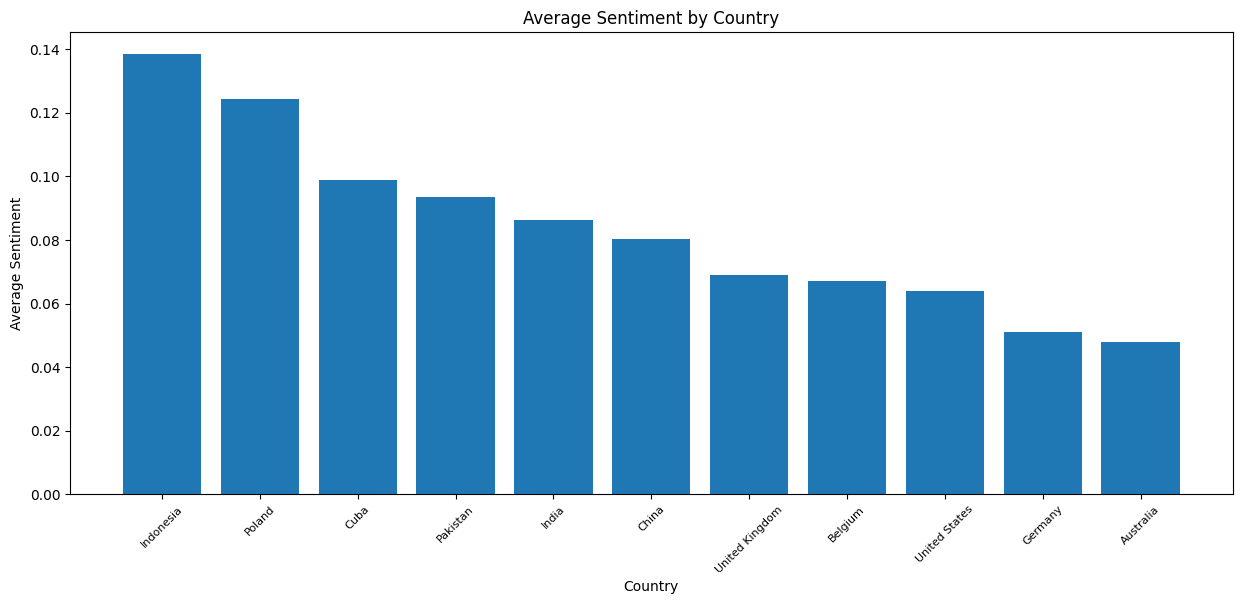

In [74]:
import matplotlib.pyplot as plt

country_stats = results_df.groupby('Country')['Sentiment'].agg(['mean', 'count']).reset_index()

country_stats = country_stats.sort_values(by='mean', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))  # Removed the 1 and use 'ax' instead of 'axes'

# Use ax directly instead of ax[0]
ax.bar(country_stats['Country'], country_stats['mean'])
ax.set_xlabel("Country")
ax.set_ylabel("Average Sentiment")
ax.set_title("Average Sentiment by Country")
ax.tick_params(axis='x', rotation=45, labelsize=8)  # Rotate x-axis labels

In [77]:
import plotly.express as px

country_sentiment = results_df.groupby('Country').agg({'Sentiment': 'mean', 'URL': 'count'}).reset_index()
country_sentiment.columns = ['Country', 'Average Sentiment', 'Article Count']

min_sent = country_sentiment['Average Sentiment'].min()
max_sent = country_sentiment['Average Sentiment'].max()
country_sentiment['Normalized Sentiment'] = (country_sentiment['Average Sentiment'] - min_sent) / (max_sent - min_sent)

fig = px.scatter_geo(country_sentiment, locations="Country", locationmode='country names',
                     color="Normalized Sentiment", size="Article Count", hover_name="Country",
                     projection="natural earth", color_continuous_scale="RdYlGn",
                     title='Sentiment Analysis on the Environmental Impacts of CPEC by Country',
                     labels={'Normalized Sentiment': 'Average Sentiment (Normalized 0-1)', 'Article Count': 'Number of Articles'}
                     )

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [27]:
# Group data by country and calculate the average sentiment
average_sentiments = results_df.groupby('Country')['Sentiment'].mean()

# Print the average sentiment for China, Pakistan, and Western countries
print("Average Sentiment Scores:")
print(f"China: {average_sentiments.get('China', 'N/A')}")
print(f"Pakistan: {average_sentiments.get('Pakistan', 'N/A')}")

# Define Western countries (you might need to adjust this list)
western_countries = ['USA', 'UK', 'Canada', 'France', 'Germany', 'Australia', 'Switzerland', 'Belgium', 'The Netherlands']  # Add other countries as needed

# Calculate the average sentiment for all Western countries
western_sentiment = results_df[results_df['Country'].isin(western_countries)]['Sentiment'].mean()
print(f"Western Countries (average): {western_sentiment}")

Average Sentiment Scores:
China: 0.080212609023992
Pakistan: 0.09386101308253932
Western Countries (average): 0.05037873874660561


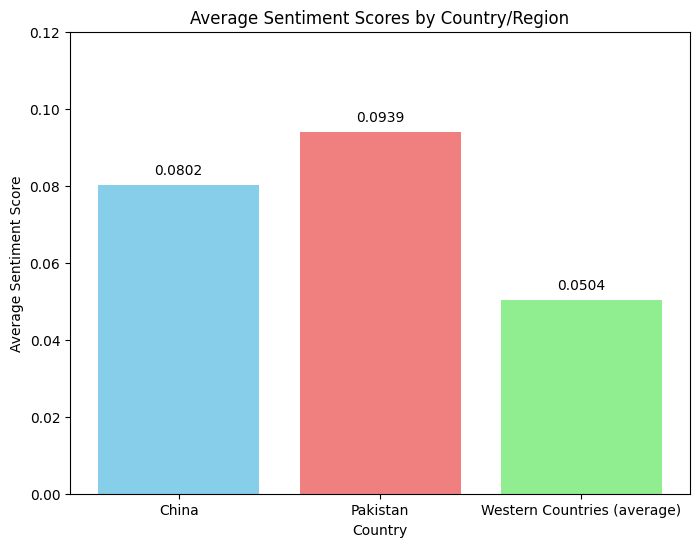

In [30]:
countries = ['China', 'Pakistan', 'Western Countries (average)']
average_sentiments = [0.080212609023992, 0.09386101308253932, 0.05037873874660561]


plt.figure(figsize=(8, 6))
plt.bar(countries, average_sentiments, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Average Sentiment Scores by Country/Region')
plt.xlabel('Country')
plt.ylabel('Average Sentiment Score')
plt.ylim(0, 0.12)  # Adjust y-axis limit for better visualization

for i, v in enumerate(average_sentiments):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

plt.show()